<h1 align=right><span style='font-family:Arial Black'>Henry</span></h1>
<p><img src="formas/EDA.jpg", width="250"></p>

# EDA: *`Exploración y análisis de datos:`*
> **Objetivo EDA:** `Explorar y analizar los datos del dataset de trabajo para crear el insumo de mis endpoints y obtener la mas acertada interacción entre las variables para obtener el mejor resultado posible.`

In [1]:
# Aquí, importamos todas las librerias que vamos a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

## *`Analizando los datos para crear el insumo de mis endpoints`*

In [2]:
# Abrimos el archivo de trabajo que mandamos a folder data
df = pd.read_csv('../data/df_trabajo.csv')
df.head(2)

,user_id,item_id,playtime_forever,sentiment_analysis,recommend,review,posted_year,title,id,release_year,genero
0,76561197970982479,22200,271,1,True,It's unique and worth a playthrough.,2011,Lost Summoner Kitty,761140.0,2018,Casual
1,76561197970982479,1250,10006,1,True,Simple yet with great replayability. In my opi...,2011,Lost Summoner Kitty,761140.0,2018,Action


In [3]:
# Para esto, verificamos la cantidad de registros y columnas
df.shape

(43863, 11)

In [4]:
# Encontrándose 11 columnas y 43863 registros.
# Y todos los tipos de dato en su lugar, sin datos nulos.
# Entonces, partimos este proceso EDA con dataset limpio.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43863 entries, 0 to 43862
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             43863 non-null  object 
 1   item_id             43863 non-null  int64  
 2   playtime_forever    43863 non-null  int64  
 3   sentiment_analysis  43863 non-null  int64  
 4   recommend           43863 non-null  bool   
 5   review              43863 non-null  object 
 6   posted_year         43863 non-null  int64  
 7   title               43863 non-null  object 
 8   id                  43863 non-null  float64
 9   release_year        43863 non-null  int64  
 10  genero              43863 non-null  object 
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 3.4+ MB


### `Para el primer endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['genero','release_year','playtime_forever']]`

In [5]:
# Sin embargo, 'df.playtime_forever' está en 'minutos', así que vamos a crear
# la columna 'df.playtime_hours' en 'horas'
df['playtime_hours'] = df['playtime_forever']/60

In [6]:
# Vemos que ahora tenemos 12 columnas y los mismos 43863 registros
# y aparece la columna 'playtime_hours'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43863 entries, 0 to 43862
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             43863 non-null  object 
 1   item_id             43863 non-null  int64  
 2   playtime_forever    43863 non-null  int64  
 3   sentiment_analysis  43863 non-null  int64  
 4   recommend           43863 non-null  bool   
 5   review              43863 non-null  object 
 6   posted_year         43863 non-null  int64  
 7   title               43863 non-null  object 
 8   id                  43863 non-null  float64
 9   release_year        43863 non-null  int64  
 10  genero              43863 non-null  object 
 11  playtime_hours      43863 non-null  float64
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 3.7+ MB


In [7]:
# Ahora en el archivo df, necesitamos las columnas: 'genero','release_year','playtime_hours'
# para generar nuestro dataset 'genero.csv'
genero = df[['genero','release_year','playtime_hours']].groupby(['release_year','genero']).count().sort_values(by='playtime_hours',ascending=False)
genero.reset_index(inplace=True)
genero.head()

,release_year,genero,playtime_hours
0,2017,Indie,3861
1,2016,Indie,2653
2,2017,Action,2413
3,2017,Casual,2014
4,2017,Adventure,1928


In [8]:
#genero.to_csv('genero.csv',index=False)

### `Para el segundo endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['genero','posted_year','user_id','playtime_hours']]`

In [9]:
# De el dataset df, necesitamos las columnas: 'genero','posted_year','user_id','playtime_hours'
# para generar nuestro dataset:'userforgenre.csv'
gene = df[['genero','posted_year','user_id','playtime_hours']].groupby(['posted_year','genero','user_id']).sum()
gene.reset_index(inplace=True)
gene

,posted_year,genero,user_id,playtime_hours
0,2010,Action,76561197995098683,107.950000
1,2010,Action,AzzX,77.083333
2,2010,Action,ToxWolf,182.466667
3,2010,Action,bigodo,139.666667
4,2010,Action,farsel,2.166667
...,...,...,...,...
39566,2023,Web Publishing,lutzayy,2.550000
39567,2023,Web Publishing,martiantrain,8.000000
39568,2023,Web Publishing,sandw1ch,2.916667
39569,2023,Web Publishing,thecompl3x,1065.016667


In [10]:
#gene.to_csv('userforgenre.csv',index=False)

### `Para el tercer endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['recommend','posted_year','sentiment_analysis','title']]`

In [11]:
# De el archivo 'df', necesitamos las columnas:'sentiment_analysis', 'recommend', 'posted_year','title', 
# se creara el dataset de trabajo: 'UsersRecommend.csv'
rec = df[df.recommend==True][['posted_year','sentiment_analysis','title']].groupby(['posted_year','title']).count().sort_values(by='sentiment_analysis',ascending=False)
rec.reset_index(inplace=True)
rec

,posted_year,title,sentiment_analysis
0,2014,VAULT OF HONOR,10
1,2015,M.EXE,9
2,2023,Still Not Dead,9
3,2015,Expect The Unexpected,8
4,2015,Dungeon Rushers: Crawler RPG,8
...,...,...,...
28416,2014,Post Apocalyptic Mayhem: DLC - Chaos Pack,1
28417,2014,Poseidon - Project Dark Sky,1
28418,2014,Portal Knights,1
28419,2014,Portal 2,1


In [12]:
#rec.to_csv('UsersRecommend.csv',index=False)

### `Para el cuarto endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['recommend','posted_year','sentiment_analysis','title']]`

In [13]:
# De el archivo 'df', necesitamos las columnas:'sentiment_analysis', 'recommend', 'posted_year','app_name', 
# se creara el dataset de trabajo: 'UsersNotRecommend.csv'
reco = df[df.recommend==False][['posted_year','sentiment_analysis','title']].groupby(['posted_year','title']).count().sort_values(by='sentiment_analysis',ascending=False)
reco.reset_index(inplace=True)
reco

,posted_year,title,sentiment_analysis
0,2014,Pixel Puzzles Ultimate - Puzzle Pack: Jigsaw,6
1,2014,Niffelheim,4
2,2023,EURGAVA™ - Fight for Haaria,4
3,2015,Melina (Character for Occult Raise),4
4,2023,Space Ripper,4
...,...,...,...
4450,2015,All Guns On Deck,1
4451,2015,All Haze Eve,1
4452,2015,Altar Guardian,1
4453,2015,Ambre - Original Soundtrack,1


In [14]:
#reco.to_csv('UsersNotRecommend.csv',index=False)

### `Para el quinto endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['release_year','review','sentiment_analysis']]`

In [15]:
# De el archivo 'df', necesitamos las columnas:'release_year','review','sentiment_analysis',
# vamos a crear el dataset de trabajo: 'sentimientos.csv'
sent = df[['release_year','review','sentiment_analysis']]
sent.tail(10000)

,release_year,review,sentiment_analysis
33863,2016,"This game is plain awesome, there are so many ...",2
33864,2016,"VERY NICE, GREAT SUCCESS!",2
33865,2016,This game WILL reset your characters! Just had...,0
33866,2015,Really fun game with tons to explore and do! R...,2
33867,2015,First time playing this gameJoins serverAll I ...,2
...,...,...,...
43858,2018,Esse jogo é simplesmente muito ♥♥♥♥.... nunca ...,2
43859,2018,"Quer ser uma pessoa feliz? simples, Compre Gar...",2
43860,2018,Great game 10/10 xd xd,1
43861,2017,One of the best games out there.,2


In [16]:
# Aqui tomamos los últimos 10000 registros para salvarlo y ahorar memoria
#sent.tail(10000).to_csv('sentimientos.csv',index=False)

### `Para el sexto endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* Aquí, no pude usar la función para estas columnas: `title, id` con la similitud del coseno.
* `Así que yo decidí usar las siguientes columnas:`
* `df[['review','title']]`

In [17]:
# De el archivo 'df', necesitamos las columnas: 'title', 'review',
# vamos a crear el dataset del trabajo: 'recomendacion_juego.csv'
rec_juego = df[['review','title']]
rec_juego.head(2000)

,review,title
0,It's unique and worth a playthrough.,Lost Summoner Kitty
1,Simple yet with great replayability. In my opi...,Lost Summoner Kitty
2,Great atmosphere. The gunplay can be a bit chu...,Lost Summoner Kitty
3,For a simple (it's actually not all that simpl...,Lost Summoner Kitty
4,Very fun little game to play when your bored o...,Ironbound
...,...,...
1995,I'm being serious right now. This is probably ...,Toki Tori 2+
1996,"Okay, so I'm hearing you ask ""Why should I buy...",BIT.TRIP.FATE Soundtrack
1997,Arma 3 is a military simulation game. Let me t...,R.I.P.D.: The Game
1998,Lambda Wars is a very good RTS.If you like rea...,BIT.TRIP.FATE Soundtrack


In [18]:
# Aquí, usamos los primeros 2000 registros para ahorar memoria
#rec_juego.head(2000).to_csv('recomendacion_juego.csv',index=False)

### `Para el septimo endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['user_id','title']]`

In [19]:
# De el dataset 'df', tomamos las columnas: 'user_id','title',
# para crear el dataset de trabajo: 'recomendacion_usuario.csv'
rec_usuario = df[['user_id','title']]
rec_usuario

,user_id,title
0,76561197970982479,Lost Summoner Kitty
1,76561197970982479,Lost Summoner Kitty
2,76561197970982479,Lost Summoner Kitty
3,js41637,Lost Summoner Kitty
4,js41637,Ironbound
...,...,...
43858,76561198087196831,Russian Roads
43859,76561198087196831,Russian Roads
43860,76561198087216220,Russian Roads
43861,L3afBlower,EXIT 2 - Directions


In [20]:
# Aquí, no necesite reducir los registros porque no ocupa tanta memoria.
#rec_usuario.to_csv('recomendacion_usuario.csv',index=False)

## *`Analizando los datos de mis variables`*

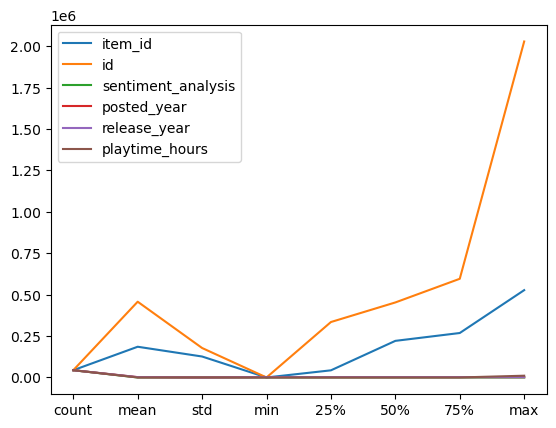

In [21]:
# Un gráfico de la parte estadística, nos muestra a detalle la interrelación de 
# 6 variables numéricas: Aquí, sacamos de la lista de columnas a 'playtime_forever'
df[['item_id','id','sentiment_analysis','posted_year','release_year','playtime_hours']].describe().plot();

**Aqui se puede ver la alta similitud entre las variables:**
- *`sentiment_analysis, posted_year, release_year y playtime_hours`*

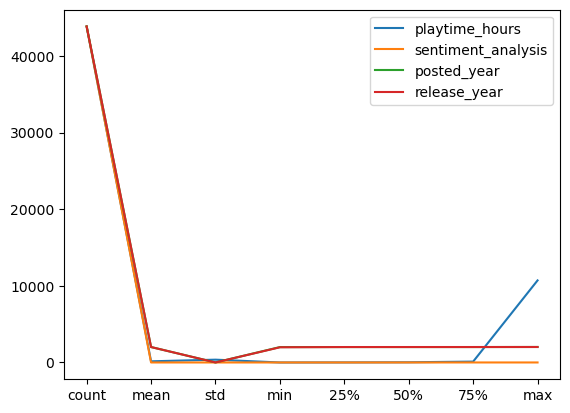

In [22]:
# Aquí tenemos un acercamiento y perspectiva de las variables anteriores
df[['playtime_hours','sentiment_analysis','posted_year','release_year']].describe().plot();

**Aqui lo mas fácil de constatar, jugando un poco con los datos, es:**
- `Contar los datos y clasificarlos`

**Para eso, mostramos la grafica de la clasificación de la columna `sentiment_analysis`**

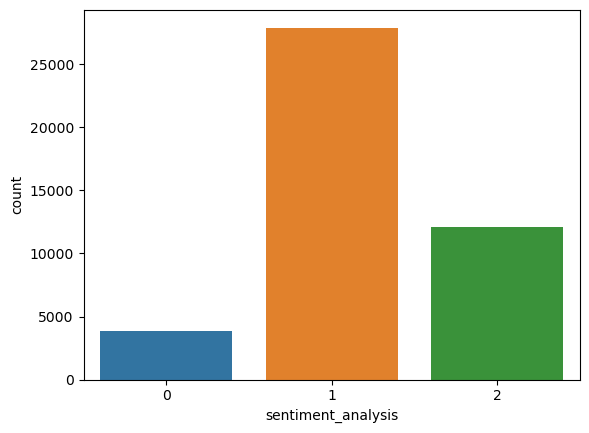

In [23]:
# Este gráfico, se presenta para mostrar el desglose de los parámetros de la columna 
# de 'sentiment_analysis' de los juegos de video, siendo los parámetros a medir: 
# 'Negative':0 ,'Neutral':1, 'Positive':2, y para constatar lo mostrado anteriormente.
sns.countplot(x='sentiment_analysis',data=df)
plt.show()

In [24]:
# Mostrando como aparecen los datos en la columna 'sentiment_analysis'
df['sentiment_analysis'].values

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

In [25]:
# Su clasificación 
print('Neutral =',df[df.sentiment_analysis==1].count()[0])
print('Positive =',df[df.sentiment_analysis==2].count()[0])
print('Negative = ',df[df.sentiment_analysis==0].count()[0])

Neutral = 27913
Positive = 12094
Negative =  3856


**Cantidades mas sobresalientes de la columna sentiment_analysis:**
- *`Muestra 27913 registros para la parte Neutral, y en segundo lugar con 12094 registros en la parte Positive`*

**Ahora, revisamos, la variable `posted_year`**

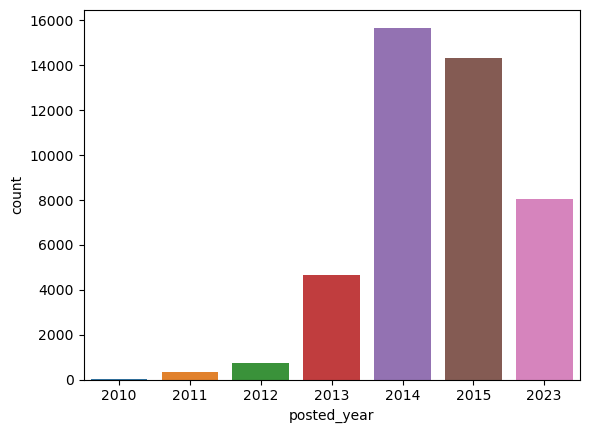

In [26]:
# Continuando con el análisis de las variables numéricas, en este caso los años en que se hicieron reviews de los juegos de video,
# se observa la columna 'posted_year'
sns.countplot(x='posted_year',data=df)
plt.show()

In [27]:
# La columna muestra los años en el orden como aparecen en el dataset
df['posted_year'].values

array([2011, 2011, 2011, ..., 2015, 2014, 2014], dtype=int64)

In [28]:
# Ahora tenemos que revisar la cantidad de registros por año.
print('posted_year','|','registros')
print(2011,'-----------',df[df['posted_year']==2011].count()[0])
print(2012,'-----------',df[df['posted_year']==2012].count()[0])
print(2013,'-----------',df[df['posted_year']==2013].count()[0])
print(2014,'-----------',df[df['posted_year']==2014].count()[0])
print(2015,'-----------',df[df['posted_year']==2015].count()[0])
print(2023,'-----------',df[df['posted_year']==2023].count()[0])

posted_year | registros
2011 ----------- 356
2012 ----------- 755
2013 ----------- 4659
2014 ----------- 15680
2015 ----------- 14311
2023 ----------- 8061


**`Sobresale el año 2014 con 15680 registros y seguido por el año 2015 con 14311 registros.`**

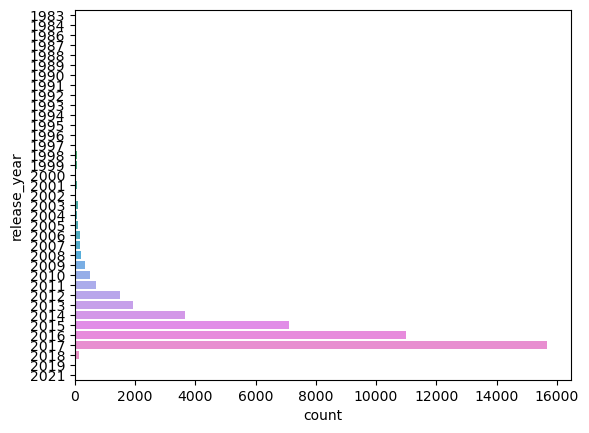

In [29]:
# Ahora mostramos la variable numerica de los años de lanzamiento de los juegos de video
sns.countplot(y='release_year',data=df)
plt.show()

In [30]:
# La columna muestra los años en el orden como aparecen en el dataset
df['release_year'].values

array([2018, 2018, 2018, ..., 2018, 2017, 2017], dtype=int64)

In [31]:
# Ahora tenemos que revisar la cantidad de registros por año.
print('release_year','|','registros')
print(2018,'-----------',df[df['release_year']==2018].count()[0])
print(2017,'-----------',df[df['release_year']==2017].count()[0])
print(2016,'-----------',df[df['release_year']==2016].count()[0])
print(2015,'-----------',df[df['release_year']==2015].count()[0])
print(2014,'-----------',df[df['release_year']==2014].count()[0])
print(2013,'-----------',df[df['release_year']==2013].count()[0])
print(2012,'-----------',df[df['release_year']==2012].count()[0])
print(2011,'-----------',df[df['release_year']==2011].count()[0])
print(2010,'-----------',df[df['release_year']==2010].count()[0])
print(2009,'-----------',df[df['release_year']==2009].count()[0])
print(2008,'-----------',df[df['release_year']==2008].count()[0])
print(2007,'-----------',df[df['release_year']==2007].count()[0])
print(2006,'-----------',df[df['release_year']==2006].count()[0])
print(2005,'-----------',df[df['release_year']==2005].count()[0])

release_year | registros
2018 ----------- 151
2017 ----------- 15684
2016 ----------- 10996
2015 ----------- 7120
2014 ----------- 3645
2013 ----------- 1934
2012 ----------- 1497
2011 ----------- 687
2010 ----------- 491
2009 ----------- 335
2008 ----------- 215
2007 ----------- 174
2006 ----------- 159
2005 ----------- 92


**`En la columna release_year sobresale el año 2017, seguido por el 2016 con 15684 y 10996 registros respectivamente.`**

In [32]:
# En cuanto a correlación, vemos que hay una sobresaliente la que corresponde a: 0.580668
# entre las variables 'id' y 'release_year'
df.corr()

,item_id,playtime_forever,sentiment_analysis,recommend,posted_year,id,release_year,playtime_hours
item_id,1.000000,-0.286916,-0.027781,-0.100182,0.277919,0.018411,0.018280,-0.286916
playtime_forever,-0.286916,1.000000,0.004458,0.054246,-0.007000,0.008889,0.003204,1.000000
sentiment_analysis,-0.027781,0.004458,1.000000,0.107660,-0.033684,0.001286,0.012512,0.004458
recommend,-0.100182,0.054246,0.107660,1.000000,-0.101109,-0.021457,-0.020841,0.054246
posted_year,0.277919,-0.007000,-0.033684,-0.101109,1.000000,0.031976,0.030129,-0.007000
id,0.018411,0.008889,0.001286,-0.021457,0.031976,1.000000,0.580668,0.008889
release_year,0.018280,0.003204,0.012512,-0.020841,0.030129,0.580668,1.000000,0.003204
playtime_hours,-0.286916,1.000000,0.004458,0.054246,-0.007000,0.008889,0.003204,1.000000


Correlación de Pearson = 0.580668


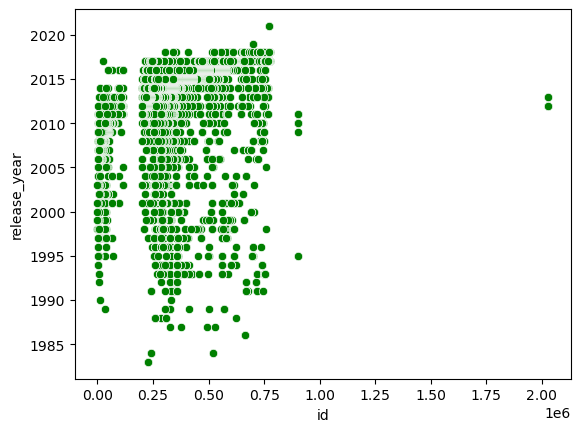

In [33]:
# Así que procedemos a tomar un gráfico, y vemos la correlacion entre las variables mostradas.
print('Correlación de Pearson =',0.580668)
sns.scatterplot(y='release_year',x='id',data=df,color='g')
plt.show()

**Aqui vemos una mancha de puntos concentrada en el primer tercio del marco del gráfico:**
- *`Que efectivamente hay una Correlación de Pearson cercana al 60% entre las variables id y release_year`*

## *`Analizando los datos de mis variables restantes`*

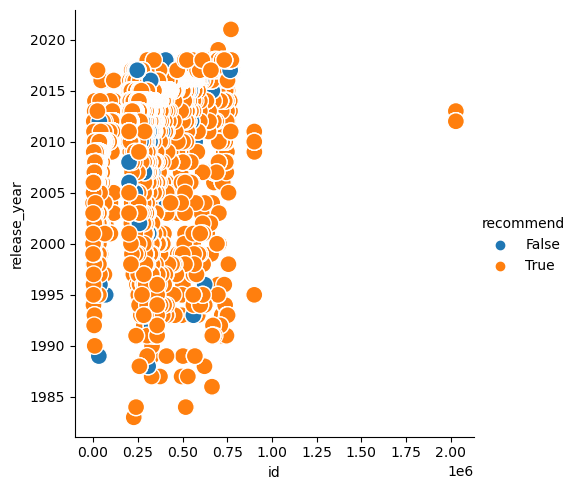

In [34]:
# Retomamos este par de variables correlacionadas para pintarlas de 'True' o 'False',
sns.relplot(x='id',y='release_year',hue='recommend',data=df,s=150)
plt.show()

**Aqui vemos una mancha de puntos concentrada en el primer tercio del marco del gráfico:**`Pero, ahora pintada de True o False`

In [35]:
print('Recomendados =', df[df.recommend==True].count()[0])
print('No Recomendados =', df[df.recommend==False].count()[0])

Recomendados = 38926
No Recomendados = 4937


### `Sobresaliendo el segmento True o de juegos recomendados con 38926 registros.`

## `Cantidad de títulos más recomendados de videojuegos`

In [36]:
# Títulos como aparecen en la columna
df['title'].values

array(['Lost Summoner Kitty', 'Lost Summoner Kitty',
       'Lost Summoner Kitty', ..., 'Russian Roads', 'EXIT 2 - Directions',
       'EXIT 2 - Directions'], dtype=object)

In [37]:
#Buscando mas titulos para nuestra proxima gráfica.
df[['id','title']].head(25)

,id,title
0,761140.0,Lost Summoner Kitty
1,761140.0,Lost Summoner Kitty
2,761140.0,Lost Summoner Kitty
3,761140.0,Lost Summoner Kitty
4,643980.0,Ironbound
5,761140.0,Lost Summoner Kitty
6,670290.0,Real Pool 3D - Poolians
7,670290.0,Real Pool 3D - Poolians
8,643980.0,Ironbound
9,670290.0,Real Pool 3D - Poolians


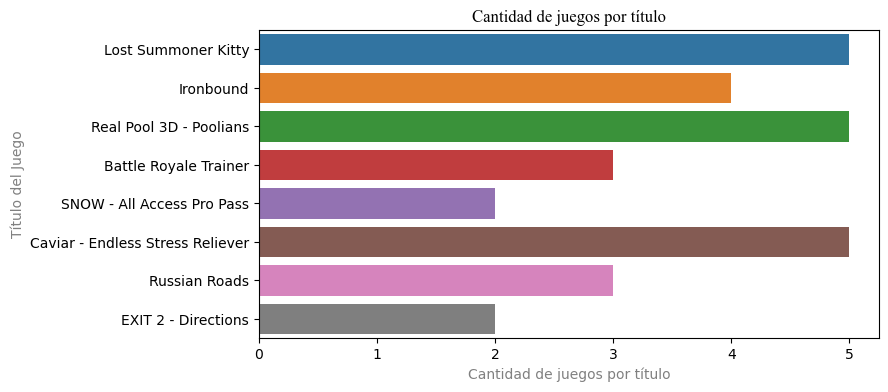

In [38]:
# Vamos a ver, cuales son los titulos más sobresalientes en videojuegos.
titulo = df[df['title'].isin(['Lost Summoner Kitty','Ironbound','Real Pool 3D - Poolians','Battle Royale Trainer','SNOW - All Access Pro Pass',
                              'Caviar - Endless Stress Reliever','Russian Roads','EXIT 2 - Directions'])]
plt.figure(figsize=(8,4))
plt.title('Cantidad de juegos por título',fontname='Times New Roman')
sns.countplot(y='title',data=titulo)
plt.ylabel('Título del Juego',color='gray')
plt.xlabel('Cantidad de juegos por título',color='gray')
plt.show()

### Hagamos una nube de palabras de la columna de titulos de juegos mas recomendados

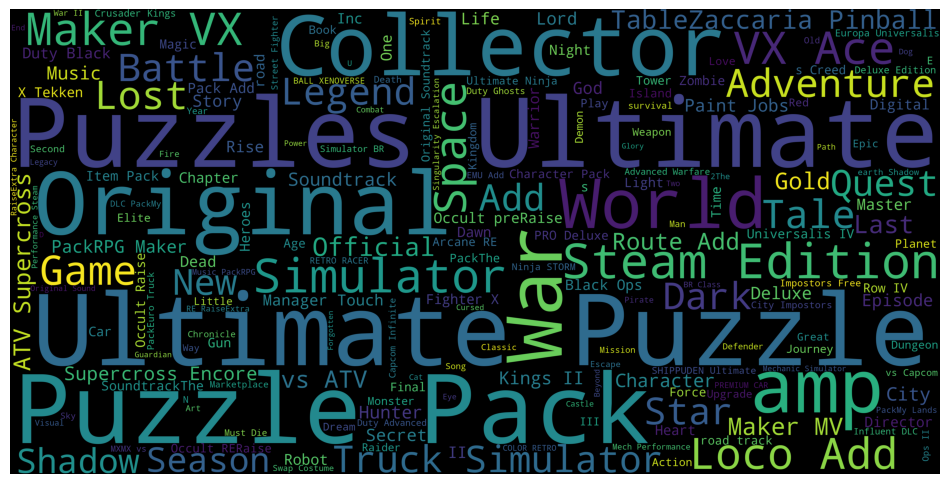

In [39]:
# Creamos variable para 'title', para desplegar palabras que mas se repiten en 'title' o nombres de juegos. 
df['title'] = df['title'].astype('str')
rec_juego_wd = ''.join(df['title'])
rec_juego_wc = WordCloud(stopwords=STOPWORDS,background_color='black',height=2000,width=4000).generate(rec_juego_wd)
plt.figure(figsize=(12,8))
plt.imshow(rec_juego_wc)
plt.axis('off');

**En estos gráficos se muestran los títulos de videojuegos más recomendados.**
- `Con 5 registros:` **`Lost Summoner Kitty, Real Pool 3D - Poolians y Caviar - Endless Stress Reliever`**.
- `Con 4 registros:` **`Ironbound`**.
- `Con 3 registros:` **`Battle Royale Trainer`**
> **Las palabras que mas se repiten en titulos recomendados son:**
- *`Ultimate, Puzzles, Puzzle, Pack, Collector, Original`*

### `Ahora analicemos que pasa, con los principales generos de videojuegos`

In [40]:
# Revisamos los tipos de 'género'
df['genero'].values

array(['Casual', 'Action', 'Indie', ..., 'Simulation', 'Casual', 'Indie'],
      dtype=object)

In [41]:
# Buscamos mas tipos de género 
df['genero'].head(15)

0           Casual
1           Action
2            Indie
3         Strategy
4     Free to Play
5       Simulation
6     Free to Play
7            Indie
8            Indie
9           Casual
10        Strategy
11             RPG
12          Sports
13          Action
14          Casual
Name: genero, dtype: object

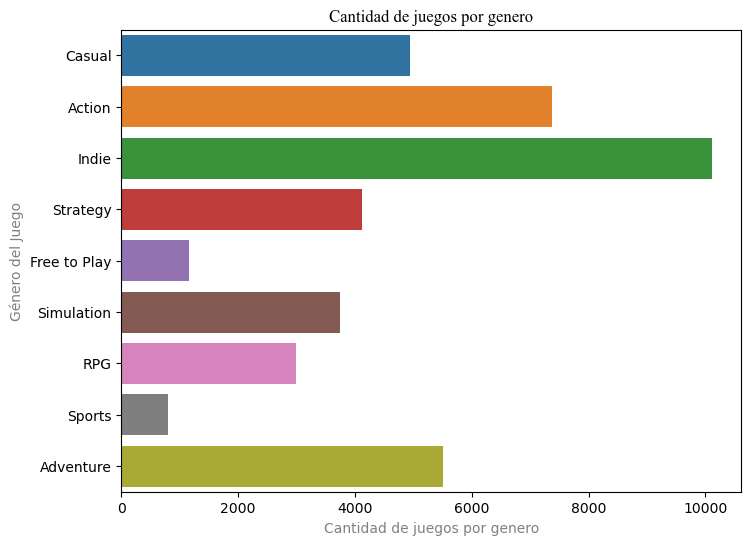

In [42]:
# Vamos a ver, cuales son los géneros más recomendables.
genero = df[df['genero'].isin(['Casual','Action','Indie','Strategy','Simulation','Free to Play','Sports','Adventure','RPG'])]
plt.figure(figsize=(8,6))
plt.title('Cantidad de juegos por genero',fontname='Times New Roman')
sns.countplot(y='genero',data=genero)
plt.ylabel('Género del Juego',color='gray')
plt.xlabel('Cantidad de juegos por genero',color='gray');

### *Y la nube de palabras de la columna:* `genero`

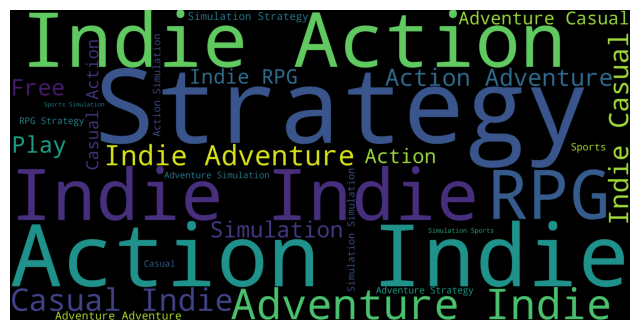

In [43]:
# Esta nube de palabras nos genera los principales géneros.
# Creamos variable para 'genero', para desplegar palabras que mas se repiten en 'genero' de los videojuegos. 
df['genero'] = df['genero'].astype('str')
genero_wd = ' '.join(genero['genero'])
genero_wc = WordCloud(stopwords=STOPWORDS,background_color='black',height=2000,width=4000).generate(genero_wd)
plt.figure(figsize=(8,6))
plt.imshow(genero_wc)
plt.axis('off');

**Analizando los géneros de los videojuegos:**
- *`La primera posición la ocupa Indie y Action.`*
> **Con la nube de palabras, nos damos cuenta y constatamos la respuesta de nuestra gráfica anterior:**
- *`Las palabras o géneros que mas se repiten son: Indie, Action y Strategy`*

### *Vamos a hacer una nube de palabras de la columna:* `review`

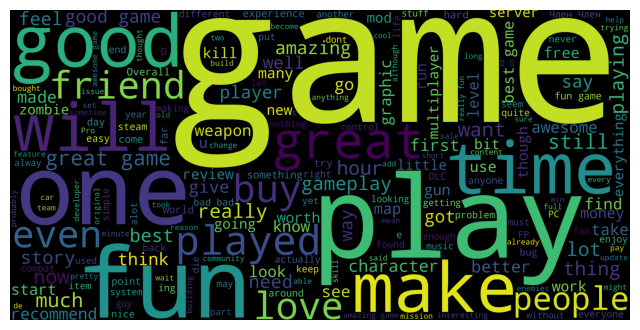

In [44]:
# Esta nube de palabras nos genera los principales 'review'.
# Creamos variable para 'review', para desplegar palabras que mas se repiten en 'review' de los videojuegos.
df1 = df[['title','review']]
df1['review'] = df1['review'].astype('str')
review_wd = ' '.join(df1['review'])
review_wc = WordCloud(stopwords=STOPWORDS,background_color='black',height=2000,width=4000).generate(review_wd)
plt.figure(figsize=(8,6))
plt.imshow(review_wc)
plt.axis('off');

### *`En esta nube de palabras, resaltan:`*
* `game, play, fun, one, will, good, time, make`

## Resumen_EDA:
* `Títulos mas recomendados con género y comentario`

In [45]:
# Identificado el juego más recomendado con su respectivo 'id', veamos cuales son los géneros más comentados.
lista_gen_titulo_1ra_rec= df[(df.recommend==True)&(df.title=='Lost Summoner Kitty')&(df.id==761140.0)][['genero','sentiment_analysis']]
lista_gen_titulo_1ra_rec

,genero,sentiment_analysis
0,Casual,1
1,Action,1
2,Indie,1
3,Strategy,1
5,Simulation,1


**`Lost Summoner Kitty`**: `Casual[0], Action[1], Indie[2], Strategy[3] y Simulation[5]` con comentarios del segmento `Neutral`. 

In [46]:
# Identificado el segundo juego más recomendado con su respectivo 'id', veamos cuales son los géneros más comentados.
lista_gen_titulo_2da_rec = df[(df.recommend==True)&(df.title=='Real Pool 3D - Poolians')&(df.id==670290.0)][['genero','sentiment_analysis']]
lista_gen_titulo_2da_rec

,genero,sentiment_analysis
6,Free to Play,2
7,Indie,2
9,Casual,2
12,Sports,2
16,Simulation,2


**`Real Pool 3D - Poolians`**: `Free to Play[6], Indie[7], Casual[9], Sports[12] y Simulation[16]` con comentarios del segmento `Positive`.

In [47]:
# Identificado el tercer juego más recomendado con su respectivo 'id', veamos cuales son los géneros más comentados.
lista_gen_titulo_3era_rec = df[(df.recommend==True)&(df.title=='Caviar - Endless Stress Reliever')&(df.id==764740.0)][['genero','sentiment_analysis']]
lista_gen_titulo_3era_rec

,genero,sentiment_analysis
24,Adventure,2
26,Adventure,2
18791,Action,2


**`Caviar - Endless Stress Reliever`**: `Adventure[24], Adventure[26], Action[18791]` con comentarios del segmento `Positive`.

In [48]:
# Identificado el cuarto juego más recomendado con su respectivo 'id', veamos cuales son los géneros más comentados.
lista_gen_titulo_4ta_rec = df[(df.recommend==True)&(df.title=='Ironbound')&(df.id==643980.0)][['genero','sentiment_analysis']]
lista_gen_titulo_4ta_rec

,genero,sentiment_analysis
4,Free to Play,1
8,Indie,2
10,Strategy,2
11,RPG,2


**`Ironbound`**: `Free to Play[4], Indie[8], Strategy[10] y RPG[11]` con comentarios del segmento `Neutral` para el `género:Free to Play` y `Positive` para el resto de `géneros `.

In [49]:
# Identificado el quinto juego más recomendado con su respectivo 'id', veamos cuales son los géneros más comentados.
lista_gen_titulo_5ta_rec = df[(df.recommend==True)&(df.title=='Battle Royale Trainer')&(df.id==772540.0)][['genero','sentiment_analysis']]
lista_gen_titulo_5ta_rec

,genero,sentiment_analysis
13,Action,2
17,Adventure,1
20,Simulation,1


**`Battle Royale Trainer`**: `Action[13], Adventure[17] y Simulation[20]` con comentarios del segmento `Positive` para el `género:Action` y `Neutral` para el resto de `géneros `. 

<h6 align=right><i>Cohorte</i>:DataPT04</h6>
<h6 align=right><i>Mexico - 2023</i></h6>
<h6 align=left><i>Pag. 2</i></h6>